# $$\text{Projeto na Frequência:}$$

In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 2
#plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12, 5)

### $$\text{Definição do sistema:}$$

In [2]:
s = ct.tf('s')

G = ((100/(s+100))*(1/(s+36))*(1/s))

G

TransferFunction(array([100]), array([   1,  136, 3600,    0]))

### $$\text{Encontrar } k \text{ para ajuste do erro de regime permanente:}$$

In [3]:
k = 1440

### $$\text{Obter a margem de fase:}$$

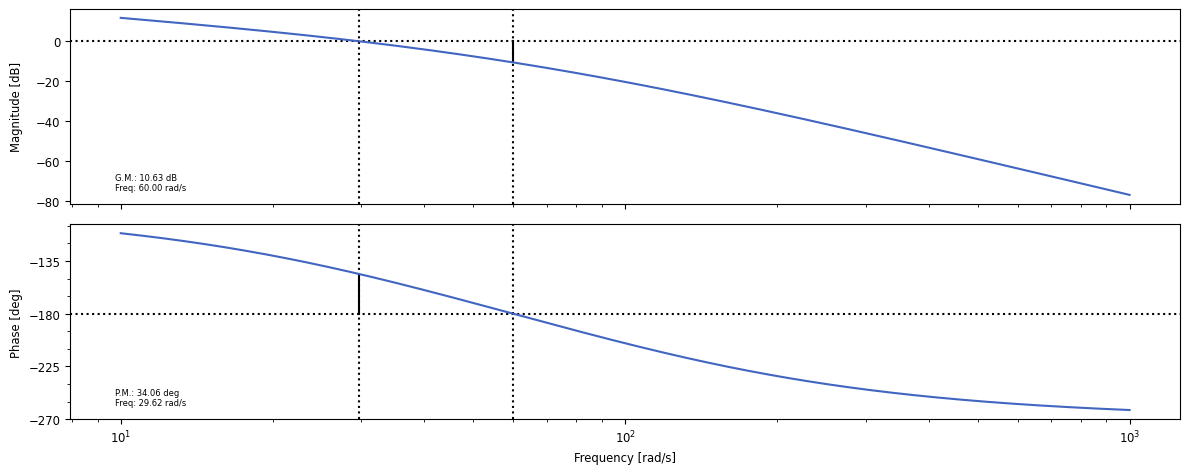

In [4]:
_ = ct.bode_plot(ct.frequency_response(k*G), sharex=True, dB=True, display_margins='overlay', title='')
mf = ct.margin(k*G)[1]

### $$\text{Obter a contribuição de fase que o controlador deve fornecer:}$$

In [5]:
#Cálculo da margem de fase desejada via amortecimento ou overshoot:
os = 0.2
zeta = (-np.log(os)/np.sqrt((np.pi**2)+(np.log(os)**2)))
print(f'zeta = {zeta:.4f}')
mfd = np.degrees(np.arctan((2*zeta)/np.sqrt((-2*(zeta**2))+np.sqrt(1+(4*(zeta**4))))))
print(f'mfd = {mfd:.4f}')

#Margem de fase desejada:
#mfd = 48

#Folga de fase:
folga = 18

#Contribuição de fase:
phi = mfd - mf + folga

phi

zeta = 0.4559
mfd = 48.1477


32.09052984477587

### $$\text{Cálculo do } \alpha \text{ :}$$

In [6]:
alpha = ((1-np.sin(np.radians(phi)))/(1+np.sin(np.radians(phi))))

alpha

0.3061151514671584

### $$\text{Cálculo da magnitude correspondente à nova frequência de cruzamento } \omega_c \text{ :}$$

In [7]:
magwc = -20*np.log10(1/np.sqrt(alpha))

magwc

-5.141151740428801

### $$\text{Nova frequência de cruzamento do } 0~dB \quad (\omega_c) \text{ :}$$

In [8]:
mag,_,omega = ct.frequency_response(k*G)

wc = omega[np.absolute(20*np.log10(mag)-magwc).argmin()]

wc

42.71993966306779

### $$\text{Cálculo do parâmetro } T \text{ :}$$

In [9]:
T = (1/(np.sqrt(alpha)*wc))

T


0.04230843455461062

### $$\text{Função de transferência do controlador projetado:}$$

In [10]:
kc = (k/alpha)
z = (1/T)
p = (1/(alpha*T))
print(f'kc = {kc}\t', f'z = {z}\t', f'p = {p}')

C = (kc*(s+z)/(s+p))

C

kc = 4704.112139168291	 z = 23.63594896684788	 p = 77.21260726091066


TransferFunction(array([  4704.11213917, 111186.15445571]), array([ 1.        , 77.21260726]))

### $$\text{Conferir a margem de fase do ramo direto compensado:}$$

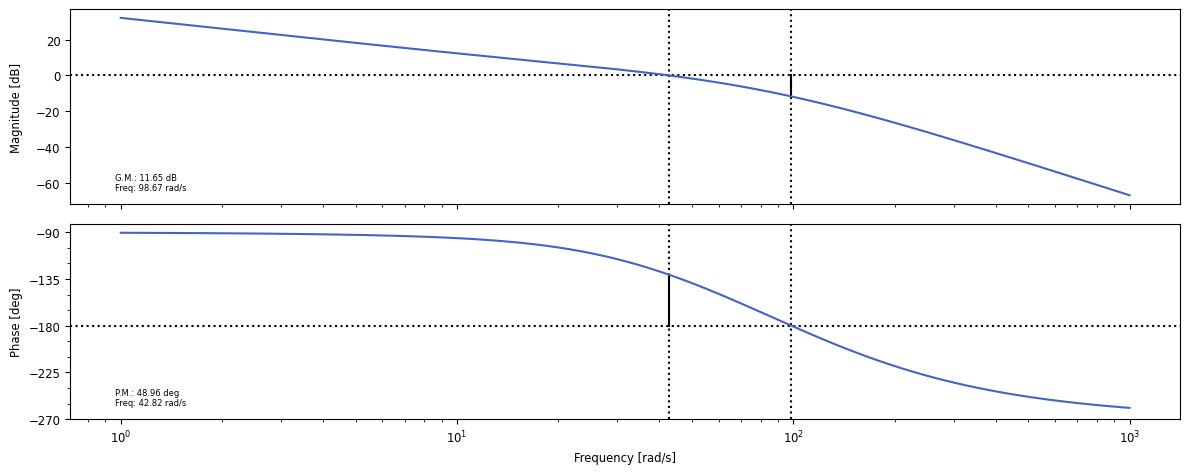

In [11]:
_ = ct.bode_plot(ct.frequency_response(C*G), sharex=True, dB=True, display_margins='overlay', title='')

### $$\text{Resposta do sistema compensado:}$$

{'RiseTime': 0.028708551150370167, 'SettlingTime': 0.15002533181806343, 'SettlingMin': 0.9181779689221607, 'SettlingMax': 1.1839578078043123, 'Overshoot': 18.395780780431224, 'Undershoot': 0, 'Peak': 1.1839578078043123, 'PeakTime': 0.06575184295729941, 'SteadyStateValue': 1.0}
kp = inf
Erro de posição: 0.00%


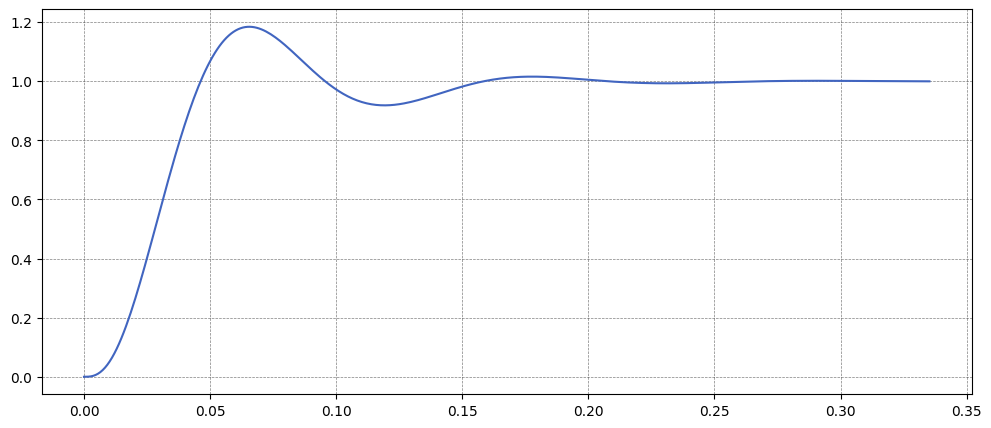

In [12]:
T = ct.feedback(C*G)
si = ct.step_info(T)
sol = ct.step_response(T)
print(si)
ep = (1-si['SteadyStateValue'])*100
kp = ct.dcgain(G)
print(f'kp = {kp:.2f}')
print(f'Erro de posição: {ep:.2f}%')

plt.figure()
plt.plot(sol[0], sol[1])
plt.show()

kv = 40.00
Erro de velocidade: 2.50%


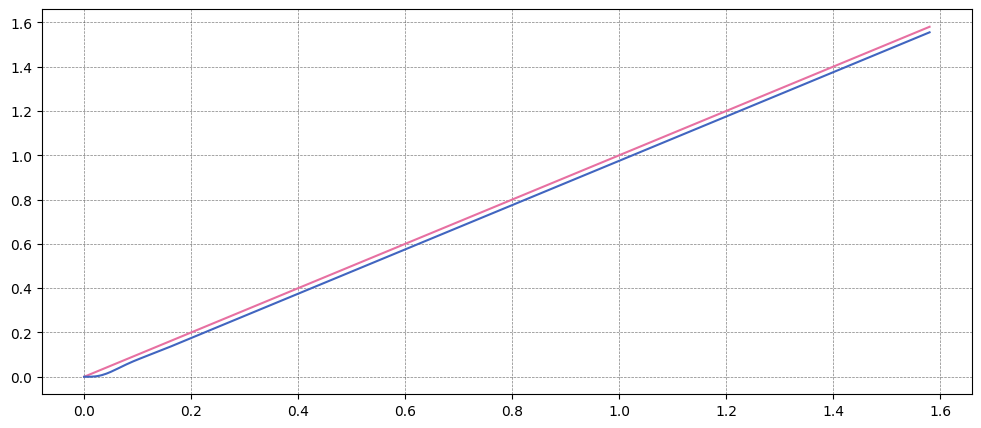

In [13]:
sol = ct.step_response(T/s)

kv = ct.dcgain(ct.minreal(C*G*s, verbose=False))
print(f'kv = {kv:.2f}')
print(f'Erro de velocidade: {100/kv:.2f}%')

plt.figure()
plt.plot(sol[0], sol[0], color='C1')
plt.plot(sol[0], sol[1])
plt.show()